# 0. Khai báo các thư viện cần dùng

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Đọc dữ liệu từ file CSV

In [ ]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/08185827/house_price_Do%CC%82%CC%81ng-Da_Ha%CC%80-No%CC%A3%CC%82i_subdata.csv", encoding = "ISO-8859-1")
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [ ]:
df.land_certificate.unique()

array(['So do', nan], dtype=object)

In [ ]:
df.property_type.unique()

array(['trong ngo', 'mat pho'], dtype=object)

# 2. Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ

In [ ]:
df["Unit_Price"] = df.price / df.area

In [ ]:
# tách ra dữ liệu cần thiết
df1 = df.loc[:, ["property_type", "Unit_Price"]]

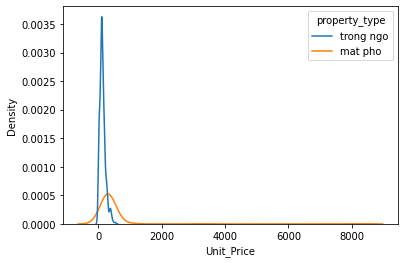

In [ ]:
#Vẽ biểu đồ so sánh phân bối giá giữa nhà phố và nhà ngõ
sns.kdeplot(x = "Unit_Price", hue = "property_type", data = df1)

# 3. Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%

In [ ]:
df1_1 = df1[df1.property_type == "trong ngo"]
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  449 non-null    object 
 1   Unit_Price     406 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [ ]:
df1_2 = df1[df1.property_type == "mat pho"]
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 449 to 670
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  222 non-null    object 
 1   Unit_Price     209 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


Giả thuyết:</br>
H0: 1 - 2 = 0 </br>
H1: 1 - 2 > 0 </br>

In [ ]:
stats.ttest_ind(df1_2.Unit_Price, df1_1.Unit_Price, equal_var = False)

Ttest_indResult(statistic=nan, pvalue=nan)

# 4. Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý với mức ý nghĩa 5%

In [ ]:
# Lấy ra dữ liệu cần thiết
df3 = df.loc[:, ["land_certificate", "price"]]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   land_certificate  369 non-null    object 
 1   price             617 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.6+ KB


In [ ]:
df3.dropna(subset = ["price"], inplace = True)
df3.fillna("khong co", inplace = True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 670
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   land_certificate  617 non-null    object 
 1   price             617 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


In [ ]:
df3.land_certificate.unique()

array(['So do', 'khong co'], dtype=object)

In [ ]:
df3_1 = df3[df3.land_certificate == "So do"]
df3_2 = df3[df3.land_certificate == "khong co"]

Kiểm định giả thiết:
H0: a1 - a2 = 0
H1: a1 - a2 > 0

In [ ]:
stats.ttest_ind(df3_1.price, df3_2.price, equal_var = False)

Ttest_indResult(statistic=-1.496109810271849, pvalue=0.1357883199612122)